# 📊 **RESUMEN DEL EJERCICIO**

## 🍇 **Wine Dataset**

Hemos utilizado el siguiente dataset:

### 🔗 [Wine Dataset en Kaggle](https://www.kaggle.com/datasets/tawfikelmetwally/wine-dataset)

Este conjunto de datos contiene información sobre diferentes características físico-químicas de distintos tipos de vino, junto con su calidad y características de la uva utilizada. Se ha empleado para realizar análisis estadísticos y aplicar algoritmos de **Machine Learning** con el objetivo de **predecir la clase de uva** y la calidad final del vino.

### 🔍 **Características del dataset**
- **ID**: Identificador único de cada vino.
- **Color Intensity**: Intensidad del color.
- **Alcohol**: Contenido de alcohol en el vino.
- **Hue**: Matiz del vino.
- **Magnesium**: Contenido de magnesio.
- **Phenols**: Contenido de fenoles totales.
- **Proanthocyanins**: Contenido de proantocianidinas.
- **Flavanoids**: Contenido de flavonoides.
- **Ash**: Cantidad de cenizas en el vino.
- **Malic Acid**: Cantidad de ácido málico.
- **OD280/OD315**: Proporción de absorción de luz.
- **Color**: Color del vino (rojo o blanco).
- **Grape Type**: Tipo de uva utilizada.
- **Quality**: Etiqueta de calidad (clasificación final del vino).

### 🧠 **Objetivo**
- Aplicar modelos de **Machine Learning** para predecir la **clase de uva** utilizada en la producción de los vinos, basándonos en las características químicas proporcionadas.

### 📈 **Análisis realizado**
1. **Preprocesamiento de datos**: Limpieza y normalización de las características.
2. **Exploración de datos**: Análisis visual y estadístico de las variables.
3. **Entrenamiento de modelos**: Implementación de algoritmos de regresión y clasificación para predicción.
4. **Evaluación**: Comparación de métricas de rendimiento para seleccionar el mejor modelo.

### 🔧 **Herramientas utilizadas**
- **Librerías**: `pandas`, `scikit-learn`, `matplotlib`.
- **Plataforma**: GitHub / Jupyter Notebook.

### 📊 **Resultados**
Los resultados obtenidos nos permiten:
- Identificar la clase de uva utilizada con un alto grado de precisión.



## Explicación de entrenar un modelo:
## Importar las Librerías:
* Utilizamos la **librería `pandas`** para la manipulación y análisis de datos.
* Usamos la **librería `sklearn`** para construir y evaluar modelos de aprendizaje automático.

## [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
> Modelo de aprendizaje automático basado en árboles de decisión, diseñado para predecir **categorías o clases**. Este modelo divide el conjunto de datos en ramas, aprendiendo reglas de decisión que permiten clasificar instancias de manera precisa, capturando relaciones entre características de forma intuitiva.




In [130]:
import pandas as pd  # Librería para manipular y analizar datos
from sklearn.model_selection import train_test_split  # Divide datos en entrenamiento y validación
from sklearn.metrics import mean_absolute_error, accuracy_score  # Métricas para evaluar el modelo
from sklearn.tree import DecisionTreeClassifier  # Modelo de árbol de decisión
from sklearn.ensemble import RandomForestClassifier  # Modelo de bosques aleatorios
from sklearn.neighbors import KNeighborsClassifier  # Modelo K-Nearest Neighbors (KNN)
from sklearn.naive_bayes import GaussianNB  # Modelo de clasificación basado en el teorema de Bayes
from sklearn.neural_network import MLPClassifier  # Modelo de red neuronal multicapa (MLP)
import matplotlib.pyplot as plt  # Librería para crear gráficos y visualizaciones
from sklearn.metrics import confusion_matrix  # Genera matriz de confusión para evaluar clasificación
from sklearn.metrics import ConfusionMatrixDisplay  # Visualiza la matriz de confusión gráficamente
from Biblioteca import EstadisticaDescriptiva  # Librería personalizada para análisis estadístico


### Cargar y Leer el Fichero de Datos:
* Definimos la ruta del fichero de datos y la almacenamos en la variable **`wine_file_path`**.
* Utilizamos el método **`pd.read_csv()`** de la librería [pandas](https://pandas.pydata.org/) para leer el contenido del fichero y almacenar los datos en la variable **`wine_data`**.
* **`wine_data`** contendrá el **DataFrame** con todos los datos del archivo, listos para ser analizados y procesados.


In [131]:
wine_file_path = 'Wine_dataset.csv'
wine_data = pd.read_csv(wine_file_path)

## Análisis Inicial de los Datos:

* Antes de construir el modelo, es fundamental **entender la estructura de los datos** y verificar su calidad.
* Utilizamos dos métodos principales:

  - **`dataFrame.info()`**: Este método proporciona un **resumen detallado** del DataFrame, mostrando:
    - **Número de filas y columnas**.
    - **Tipos de datos** en cada columna.
    - **Cantidad de valores no nulos**, lo que nos permite detectar la **presencia de valores faltantes**.

  - **`dataFrame.describe()`**: Genera **estadísticas descriptivas** para las columnas numéricas, incluyendo:
    - **Media (`mean`)**.
    - **Desviación estándar (`std`)**.
    - **Mínimo (`min`)** y **máximo (`max`)**.
    - **Percentiles** (25%, 50%, 75%).


In [132]:
wine_data.info()
print("-------------------------------------------------------------")
wine_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# Calcular la Importancia de las Características con `RandomForestClassifier`

Se utiliza el atributo `feature_importances_` del modelo entrenado para calcular la **importancia de cada característica**.  
Esto se almacena en un vector (`feature_importances`) que representa **cuánto contribuye cada característica** a la predicción final del modelo.

### Crear un DataFrame para la Importancia:
Se organiza la importancia de las características en un DataFrame llamado `importance_df` con dos columnas:  
- **`Feature`**: Nombre de la característica.  
- **`Importance`**: Valor de importancia calculado para cada característica.  
El DataFrame se ordena de **mayor a menor** importancia para facilitar la interpretación visual de los resultados.

### Mostrar la Importancia de las Características:
Se imprime el DataFrame `importance_df` para visualizar la **relevancia de cada característica** en el modelo.  
Las características con **mayor valor de importancia** tienen un mayor impacto en las predicciones, mientras que las de **menor importancia** podrían ser descartadas en futuros ajustes del modelo.



                         Feature  Importance
12                      Proline     0.181655
6                     Flavanoids    0.164055
0                        Alcohol    0.146294
9                Color intensity    0.135429
11  OD280/OD315 of diluted wines    0.129824
10                           Hue    0.082613
5                  Total phenols    0.041013
4                      Magnesium    0.032354
3              Alcalinity of ash    0.022348
8                Proanthocyanins    0.021885
1                     Malic acid    0.019838
2                            Ash    0.012625
7           Nonflavanoid phenols    0.010068


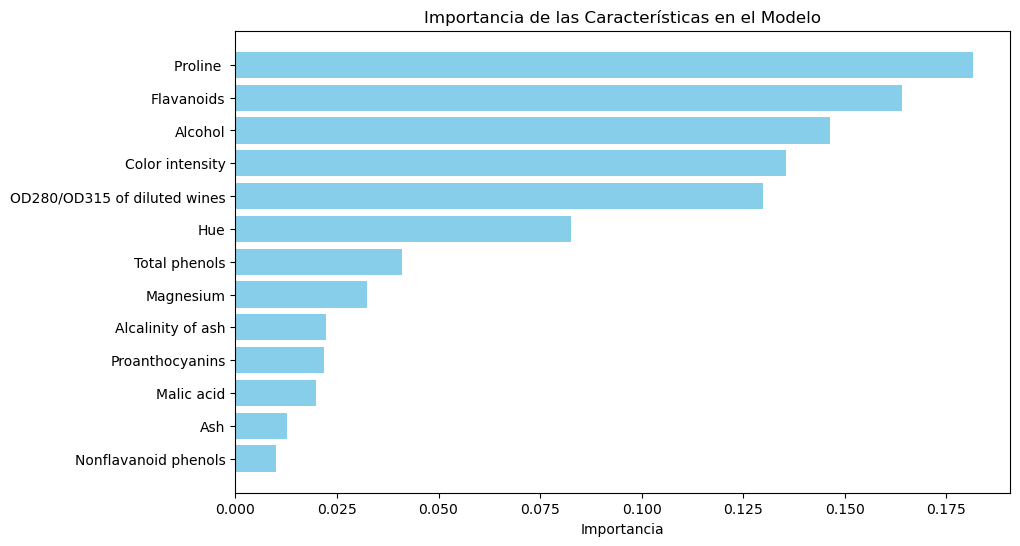

In [133]:
y = wine_data['class']
wine_features = wine_data.drop(['class'], axis=1).columns.tolist()
x = wine_data[wine_features]
model_rf = RandomForestClassifier(random_state=1)
model_rf.fit(x, y)

feature_importances = model_rf.feature_importances_
features = x.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.title('Importancia de las Características en el Modelo')
plt.gca().invert_yaxis()
plt.show()


## Definición de Variables:
>*La correcta elección de estas características es fundamental para **mejorar la capacidad predictiva** del modelo.*
* **Variable `y`**: Corresponde al valor objetivo o **target**, que es la variable que deseamos predecir.
  - En este caso, representa la **clase del vino** que queremos identificar basándonos en sus características químicas.
* **Variable `x`**: Contiene las características seleccionadas, también conocidas como **features**. Estas características representan propiedades químicas y estructurales del vino, las cuales se consideran relevantes para el modelo de Machine Learning. Cada característica se utiliza como **entrada** para el algoritmo con el fin de predecir la clase de uva o la calidad del vino.

## **Características relevantes seleccionadas:**
1. **`Proanthocyanins`**: 
   - Es una medida del contenido de proantocianidinas en el vino, un tipo de polifenol que contribuye al color y propiedades antioxidantes del vino.
   - Se considera importante ya que influye en la estructura y sensación en boca del vino.

2. **`Proline`**:
   - Es un aminoácido presente en las uvas que está relacionado con el aroma y la calidad del vino.
   - Su concentración puede indicar el grado de madurez de la uva y su influencia en la fermentación.

3. **`OD280/OD315 of diluted wines`**:
   - Representa la proporción de absorción de luz a dos longitudes de onda diferentes (280 y 315 nm) en el vino diluido.
   - Es un indicador de la concentración de compuestos fenólicos y sirve para evaluar la complejidad y calidad del vino.

4. **`Flavanoids`**:
   - Son un subgrupo de los fenoles totales, que tienen un impacto directo en el color y sabor del vino.
   - Son determinantes en la percepción del sabor y las propiedades antioxidantes, afectando la estabilidad del vino a lo largo del tiempo.

5. **`Total phenols`**:
   - Mide el contenido total de compuestos fenólicos en el vino.
   - Los fenoles contribuyen al color, amargor, y estabilidad del vino, siendo fundamentales en la clasificación y evaluación de calidad.


In [134]:
y = wine_data['class']
wine_features = ['Alcohol', 'Proline ', 'OD280/OD315 of diluted wines', 'Flavanoids', 'Color intensity']
x = wine_data[wine_features]

## Entrenamiento del Modelo:
* Se utiliza la función **`train_test_split`** de la librería [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
* Esta función divide el conjunto de datos en dos partes:
  - **Datos de Entrenamiento (80%)**: Utilizados para ajustar el modelo y aprender los patrones subyacentes.
  - **Datos de Validación (20%)**: Empleados para evaluar el rendimiento del modelo y verificar la capacidad de generalización.
* La función permite especificar el parámetro **`random_state`** para garantizar que la división sea reproducible y consistente.


In [135]:
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state= 1)

## Modelo de Regresión con DecisionTreeRegressor:
* Creamos una instancia de un modelo de **Árbol de Decisión** utilizando `DecisionTreeRegressor`, con el fin de capturar patrones en datos complejos ya que se adapta bien a relaciones no lineales.

## Entrenamiento del Modelo con los Datos de Entrenamiento:
* Entrenamos el modelo denominado **`wine_model`** mediante el uso del método `fit()`, utilizando:
  - **`train_x`**: Conjunto de características de entrenamiento.
  - **`train_y`**: Valores objetivo (etiquetas) correspondientes.
* El objetivo del entrenamiento es **ajustar el modelo** a los datos para que pueda realizar **predicciones precisas** sobre nuevos conjuntos de datos.


In [136]:
wine_model2 = RandomForestClassifier(random_state=1)
wine_model2.fit(train_x, train_y) 

RandomForestClassifier(random_state=1)


## Predicciones:
* Después de entrenar el modelo con los datos de entrenamiento, realizamos **predicciones** usando el conjunto de datos de validación. 
* Estas predicciones nos permiten evaluar el rendimiento del modelo y comprobar qué tan bien se ajusta a los datos no vistos.
* Podemos compararlas con los valores reales para calcular métricas de evaluación como la **Accuracy** y el **Error Absoluto Medio (MAE)**.


In [137]:
predictions2 = wine_model2.predict(val_x) 
print("PREDICCIONES:")
print(predictions2)
print('------------------------------------------')
print('Uvas almacenadas (valores reales):')
print(val_y.values)
print('MAE (Error Medio Absoluto):')
print(f'{mean_absolute_error(val_y, predictions2) * 100}%')

PREDICCIONES:
[3 2 1 2 1 3 2 1 3 2 1 1 2 1 2 2 3 1 2 1 1 2 3 1 1 3 1 1 1 3 2 3 3 1 2 2 2
 2 2 1 1 3 3 1 1]
------------------------------------------
Uvas almacenadas (valores reales):
[3 2 1 2 1 3 2 1 3 2 1 1 2 1 2 2 3 1 2 1 1 2 3 2 1 3 1 1 1 3 2 3 3 1 2 2 2
 2 2 1 1 2 3 1 1]
MAE (Error Medio Absoluto):
4.444444444444445%



## Accuracy:

>La **Accuracy** es una medida de rendimiento que indica el **nivel de acierto del modelo**. Se expresa en un rango de **`0`** a **`1`** , donde:

- **`0`** representa que el modelo no tiene ningún acierto.
- **`1`** representa que el modelo tiene un **acierto total**.

La fórmula general utilizada para calcular la Accuracy es: 
**`Accuracy = Número de Predicciones Correctas / Total de Predicciones`**


In [138]:
predictions_int2 = list(map(int, predictions2))
accuracy2 = accuracy_score(val_y, predictions_int2)
print("Accuracy:", accuracy2)
print('------------------------------------------')

Accuracy: 0.9555555555555556
------------------------------------------


## Análisis Estadístico Usando la Biblioteca Personalizada

### Aplicamos la biblioteca personalizada para calcular las siguientes métricas estadísticas:

- **Media Aritmética**: Valor promedio de todos los datos.
- **Mediana**: Valor que divide el conjunto de datos en dos partes iguales.
- **Percentiles (25, 50 y 75)**: Valores que indican las posiciones relativas en el conjunto de datos.
- **Varianza**: Mide la dispersión de los datos respecto a la media.
- **Desviación Típica**: Indica qué tan dispersos están los valores respecto a la media.
- **Resumen Estadístico Completo**: Proporciona una visión general de todas las métricas anteriores .


In [139]:
prueba2 = EstadisticaDescriptiva()
resumen2 = prueba2.resumenEstadistico(predictions_int2)

print("Resumen Estadístico de las Predicciones - RandomForestClassifier:")
for clave, valor in resumen2.items():
    print(f"{clave}: {valor}")
print('------------------------------------------')

Resumen Estadístico de las Predicciones - RandomForestClassifier:
Media Aritmética: 1.8222222222222222
Mediana: 2
Mínimo: 1
Máximo: 3
Percentil 25: 1
Percentil 50: 2
Percentil 75: 2
Varianza: 0.6350617283950618
Desviación Típica: 0.7969076034240493
------------------------------------------


## Matriz de Confusión

Herramienta que se utiliza para evaluar el rendimiento de un modelo de clasificación. Muestra el número de predicciones correctas e incorrectas organizadas por cada clase y proporciona información más detallada que la precisión (**accuracy**) general del modelo.

Esta matriz se representa en forma de una tabla, donde:

- **Las filas** representan las **clases reales** (etiquetas verdaderas).
- **Las columnas** representan las **clases predichas** por el modelo.

### Estructura de la matriz de confusión

|                       | **Clase Predicha: 0**        | **Clase Predicha: 1**        | ...  | **Clase Predicha: n**        |
|-----------------------|-----------------------------|-----------------------------|------|-----------------------------|
| **Clase Real: 0**     | **Verdaderos Positivos (VP)**| Falsos Negativos (FN)        | ...  |                             |
| **Clase Real: 1**     | Falsos Positivos (FP)        | **Verdaderos Negativos (VN)**| ...  |                             |
| **...**               |                             |                             | ...  |                             |

### Significado de cada término:

1. **Verdaderos Positivos (VP)**: Cantidad de muestras que pertenecen a la clase 0 y el modelo también las clasificó como clase 0.
2. **Falsos Negativos (FN)**: La cantidad de muestras que pertenecen a la clase 0 pero el modelo las clasificó incorrectamente como clase 1.
3. **Falsos Positivos (FP)**: La cantidad de muestras que pertenecen a la clase 1 pero el modelo las clasificó incorrectamente como clase 0.
4. **Verdaderos Negativos (VN)**: La cantidad de muestras que pertenecen a la clase 1 y el modelo también las clasificó como clase 1.


Matriz de Confusión - RandomForestClassifier:
[[18  0  0]
 [ 1 15  1]
 [ 0  0 10]]


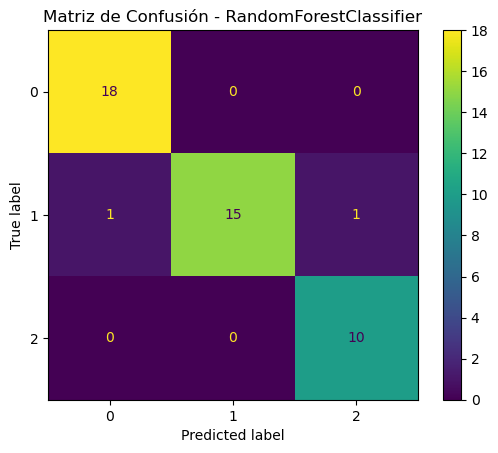

In [140]:
conf_matrix2 = confusion_matrix(val_y, predictions_int2)
print("Matriz de Confusión - RandomForestClassifier:")
print(conf_matrix2)

visualizar2 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix2)
visualizar2.plot()
plt.title("Matriz de Confusión - RandomForestClassifier")
plt.show()

# Utilizando lo anteriormente explicado, aquí pueden observar el entrenamiento de cinco modelo diferentes:

## Código completo modelo 1: Utilizando `DecisionTreeClassifier`

> Es un modelo de **clasificación basado en árboles de decisión**. Utiliza un conjunto de **reglas de decisión** para dividir el dataset en subconjuntos más pequeños y asignar una **clase** a cada uno de ellos basándose en las características seleccionadas.

### ✔️ Ventajas:
- **Rápido y fácil de interpretar**.
- **Soporta tanto datos numéricos como categóricos**.
- **No requiere de una estandarización previa de características**.
- **Capacidad de manejar relaciones no lineales y detectar interacciones complejas** entre características.

### ❌ Desventajas:
- **Propenso a sobreajuste** en datasets pequeños si no se poda adecuadamente.
- **Sensibilidad a variaciones en los datos de entrenamiento**.
- **Poca robustez**: Un pequeño cambio en los datos puede generar un árbol de decisión muy diferente.

### Parámetros clave:
- **`max_depth:`** Profundidad máxima del árbol. Controla el grado de sobreajuste.
- **`min_samples_split:`** Mínimo de muestras requeridas para dividir un nodo. Aumentar este valor ayuda a evitar sobreajuste.
- **`criterion:`** Función para medir la calidad de una división (por defecto, `gini`). También se puede usar `entropy`.
- **`random_state:`** Control de reproducibilidad. Se utiliza para obtener resultados consistentes.
- **`min_samples_leaf:`** Número mínimo de muestras que debe tener un nodo hoja.


PREDICCIONES:
[3 2 1 2 1 3 2 1 3 2 1 1 2 1 2 2 2 1 2 1 1 2 3 2 1 3 1 1 1 3 2 3 3 1 2 2 2
 1 2 1 1 2 3 1 1]
------------------------------------------
Uvas almacenadas (valores reales):
[3 2 1 2 1 3 2 1 3 2 1 1 2 1 2 2 3 1 2 1 1 2 3 2 1 3 1 1 1 3 2 3 3 1 2 2 2
 2 2 1 1 2 3 1 1]
------------------------------------------
MAE (Error Medio Absoluto):
4.444444444444445%
------------------------------------------
Accuracy: 0.9555555555555556
------------------------------------------
Resumen Estadístico de las Predicciones:
Media Aritmética: 1.7777777777777777
Mediana: 2
Mínimo: 1
Máximo: 3
Percentil 25: 1
Percentil 50: 2
Percentil 75: 2
Varianza: 0.5728395061728394
Desviación Típica: 0.7568616162633955
------------------------------------------
Matriz de Confusión:
[[18  0  0]
 [ 1 16  0]
 [ 0  1  9]]


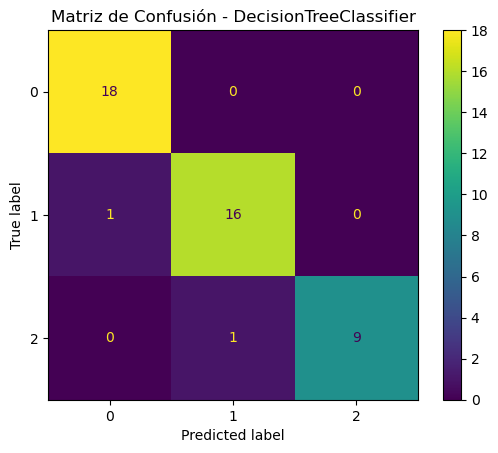

In [141]:
wine_model = DecisionTreeClassifier(random_state=1)
wine_model.fit(train_x, train_y)
predictions = wine_model.predict(val_x)

print("PREDICCIONES:")
print(predictions)
print('------------------------------------------')
print('Uvas almacenadas (valores reales):')
print(val_y.values)

print('------------------------------------------')
print('MAE (Error Medio Absoluto):')
print(f'{mean_absolute_error(val_y, predictions) * 100}%')

print('------------------------------------------')
predictions_int = list(map(int, predictions))
accuracy = accuracy_score(val_y, predictions_int)
print("Accuracy:", accuracy)
print('------------------------------------------')

prueba = EstadisticaDescriptiva()
resumen = prueba.resumenEstadistico(predictions_int)

print("Resumen Estadístico de las Predicciones:")
for clave, valor in resumen.items():
    print(f"{clave}: {valor}")
print('------------------------------------------')

conf_matrix = confusion_matrix(val_y, predictions_int)
print("Matriz de Confusión:")
print(conf_matrix)

visualizar = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
visualizar.plot()
plt.title("Matriz de Confusión - DecisionTreeClassifier")
plt.show()

### Conclusión del Modelo `DecisionTreeClassifier`

El modelo `DecisionTreeClassifier` muestra un rendimiento **decente** en términos de precisión (`accuracy`) y error medio absoluto (`MAE`). Sin embargo, los árboles de decisión pueden ser propensos a **sobreajustarse** a los datos de entrenamiento, lo que puede llevar a un rendimiento inconsistente en el conjunto de validación.

#### Puntos Clave:
- **Precisión (`accuracy`)**: La precisión indica que el modelo logra identificar correctamente muchas de las clases, pero puede ser sensible a cambios en los datos.
- **Error Medio Absoluto (`MAE`)**: El valor del MAE refleja el promedio de error en las predicciones, lo que puede ser alto si el árbol es demasiado profundo y se ajusta a los ruidos del dataset.
- **Matriz de Confusión**: La matriz de confusión ayuda a identificar las clases donde se producen la mayoría de los errores. Si la matriz muestra muchas predicciones incorrectas, hay que valorar ajustar los hiperparámetros (`max_depth` y `min_samples_split`) para reducir el riesgo de sobreajuste.


## Código completo modelo 2: Utilizando `RandomForestClassifier`

> Es un algoritmo de **clasificación basado en árboles de decisión**. Combina múltiples árboles de decisión independientes para obtener un **modelo más robusto** y **reducir el riesgo de sobreajuste**.

### ✔️ Ventajas:
- **Capacidad de manejar relaciones no lineales**.
- **Reducción de la varianza** y menor riesgo de overfitting.
- **Maneja mejor la clasificación de datos desbalanceados**.
- **Permite evaluar la importancia de cada característica** en la predicción final.

### ❌ Desventajas:
- **Más lento** y computacionalmente **costoso** en comparación con otros clasificadores simples.
- **Difícil de interpretar** debido a la complejidad del ensamble.

### Parámetros clave:
- **`n_estimators`**: Número de árboles en el bosque.
- **`max_depth`**: Profundidad máxima de cada árbol.
- **`random_state`**: Controla la reproducibilidad de los resultados.
- **`criterion`**: Criterio utilizado para medir la calidad de una división (por ejemplo, `gini` o `entropy`).


PREDICCIONES:
[3 2 1 2 1 3 2 1 3 2 1 1 2 1 2 2 3 1 2 1 1 2 3 1 1 3 1 1 1 3 2 3 3 1 2 2 2
 2 2 1 1 3 3 1 1]
------------------------------------------
Uvas almacenadas (valores reales):
[3 2 1 2 1 3 2 1 3 2 1 1 2 1 2 2 3 1 2 1 1 2 3 2 1 3 1 1 1 3 2 3 3 1 2 2 2
 2 2 1 1 2 3 1 1]
------------------------------------------
MAE (Error Medio Absoluto):
4.444444444444445%
------------------------------------------
Accuracy: 0.9555555555555556
------------------------------------------
Resumen Estadístico de las Predicciones - RandomForestClassifier:
Media Aritmética: 1.8222222222222222
Mediana: 2
Mínimo: 1
Máximo: 3
Percentil 25: 1
Percentil 50: 2
Percentil 75: 2
Varianza: 0.6350617283950618
Desviación Típica: 0.7969076034240493
------------------------------------------
Matriz de Confusión - RandomForestClassifier:
[[18  0  0]
 [ 1 15  1]
 [ 0  0 10]]


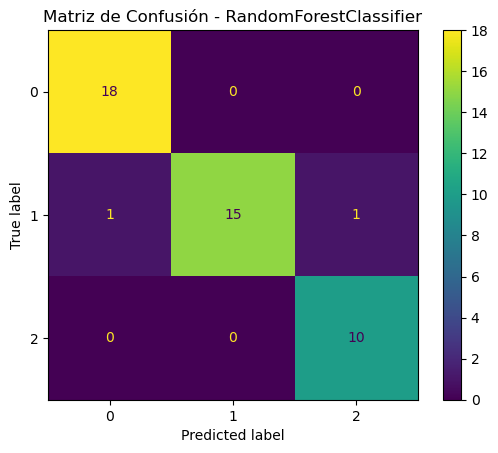

In [142]:
wine_model2 = RandomForestClassifier(random_state=1)
wine_model2.fit(train_x, train_y) 
predictions2 = wine_model2.predict(val_x) 

print("PREDICCIONES:")
print(predictions2)
print('------------------------------------------')
print('Uvas almacenadas (valores reales):')
print(val_y.values)

print('------------------------------------------')
print('MAE (Error Medio Absoluto):')
print(f'{mean_absolute_error(val_y, predictions2) * 100}%')

print('------------------------------------------')
predictions_int2 = list(map(int, predictions2))
accuracy2 = accuracy_score(val_y, predictions_int2)
print("Accuracy:", accuracy2)
print('------------------------------------------')

prueba2 = EstadisticaDescriptiva()
resumen2 = prueba2.resumenEstadistico(predictions_int2)

print("Resumen Estadístico de las Predicciones - RandomForestClassifier:")
for clave, valor in resumen2.items():
    print(f"{clave}: {valor}")
print('------------------------------------------')

conf_matrix2 = confusion_matrix(val_y, predictions_int2)
print("Matriz de Confusión - RandomForestClassifier:")
print(conf_matrix2)

visualizar2 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix2)
visualizar2.plot()
plt.title("Matriz de Confusión - RandomForestClassifier")
plt.show()

### Conclusión del Modelo `RandomForestClassifier`

El modelo `RandomForestClassifier` muestra un **buen rendimiento** en términos de precisión (`accuracy`) y bajo error medio absoluto (`MAE`). La capacidad de los bosques aleatorios para combinar múltiples árboles de decisión le permite **capturar relaciones complejas** en los datos, logrando una clasificación precisa en la mayoría de las clases.

#### Puntos Clave:
- **Precisión (`accuracy`)**: La alta precisión indica que el modelo es capaz de identificar correctamente la mayoría de las clases, minimizando los errores de predicción.
- **Error Medio Absoluto (`MAE`)**: El MAE bajo sugiere que las predicciones no se desvían significativamente de las etiquetas verdaderas.
- **Matriz de Confusión**: La matriz de confusión muestra un buen desempeño general, con pocas confusiones entre clases. Si hay errores, suelen estar concentrados en clases con menos ejemplos, lo que significa que ajustar los parámetros del modelo (como `n_estimators` o `max_depth`) podría mejorar aún más el rendimiento.


## Código completo modelo 3: Utilizando `KNeighborsClassifier`

> Es un algoritmo de **aprendizaje supervisado** basado en la proximidad de los puntos de datos. Se utiliza principalmente para tareas de **clasificación** en lugar de regresión, prediciendo la clase más frecuente de entre sus vecinos más cercanos.

### ✔️ Ventajas:
- **Sencillo y fácil de entender**.
- **Bueno para pequeñas cantidades de datos**.
- **Funciona bien con datos ruidosos** si se ajustan los parámetros correctamente.

### ❌ Desventajas:
- **Sensible a valores atípicos**.
- **Ineficiente en grandes datasets** debido a su **complejidad computacional** (`O(n)`).
- **Necesita normalización previa** de características para evitar sesgo de escala.

### Parámetros clave:
- **`n_neighbors`**: Número de vecinos a considerar.
- **`weights`**: Asigna pesos a los vecinos (`uniform`, `distance`).
- **`algorithm`**: Método para calcular los vecinos (`auto`, `ball_tree`, `kd_tree`, `brute`).


PREDICCIONES:
[2 2 3 3 1 2 3 1 3 2 1 3 2 1 2 2 2 1 2 1 1 2 2 1 1 2 1 1 1 2 2 2 2 1 2 2 2
 3 2 1 1 2 3 2 1]
------------------------------------------
Uvas almacenadas (valores reales):
[3 2 1 2 1 3 2 1 3 2 1 1 2 1 2 2 3 1 2 1 1 2 3 2 1 3 1 1 1 3 2 3 3 1 2 2 2
 2 2 1 1 2 3 1 1]
------------------------------------------
MAE (Error Medio Absoluto):
37.77777777777778%
------------------------------------------
Accuracy: 0.6666666666666666
------------------------------------------
Resumen Estadístico de las Predicciones - KNeighborsClassifier:
Media Aritmética: 1.8
Mediana: 2
Mínimo: 1
Máximo: 3
Percentil 25: 1
Percentil 50: 2
Percentil 75: 2
Varianza: 0.47111111111111115
Desviación Típica: 0.6863753427324667
------------------------------------------
Matriz de Confusión - KNeighborsClassifier:
[[15  1  2]
 [ 1 13  3]
 [ 0  8  2]]


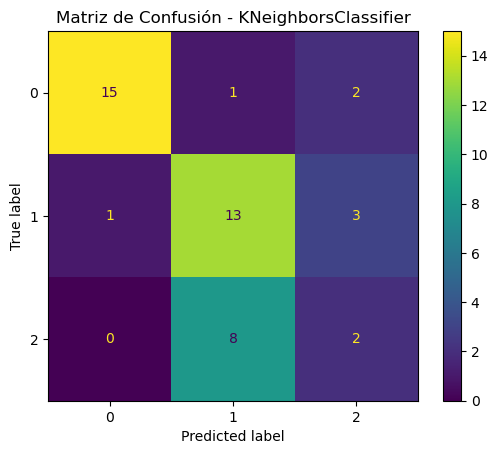

In [143]:
wine_model3 = KNeighborsClassifier(n_neighbors=5) 
wine_model3.fit(train_x, train_y) 
predictions3 = wine_model3.predict(val_x) 

print("PREDICCIONES:")
print(predictions3)
print('------------------------------------------')
print('Uvas almacenadas (valores reales):')
print(val_y.values)

print('------------------------------------------')
print('MAE (Error Medio Absoluto):')
print(f'{mean_absolute_error(val_y, predictions3) * 100}%')

print('------------------------------------------')
predictions_int3 = list(map(int, predictions3))
accuracy3 = accuracy_score(val_y, predictions_int3)
print("Accuracy:", accuracy3)
print('------------------------------------------')

prueba3 = EstadisticaDescriptiva()
resumen3 = prueba3.resumenEstadistico(predictions_int3)

print("Resumen Estadístico de las Predicciones - KNeighborsClassifier:")
for clave, valor in resumen3.items():
    print(f"{clave}: {valor}")
print('------------------------------------------')

conf_matrix3 = confusion_matrix(val_y, predictions_int3)
print("Matriz de Confusión - KNeighborsClassifier:")
print(conf_matrix3)

visualizar3 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix3)
visualizar3.plot()
plt.title("Matriz de Confusión - KNeighborsClassifier")
plt.show()

### Conclusión del Modelo `KNeighborsClassifier`

El modelo `KNeighborsClassifier` con `k=5` vecinos muestra un rendimiento moderado en términos de precisión (`accuracy`) y error medio absoluto (`MAE`). La matriz de confusión indica que el modelo puede distinguir las clases correctamente en la mayoría de los casos, pero la precisión puede depender de la elección de `k` y de la distancia entre puntos en el espacio de características.

#### Puntos Clave:
- **Precisión (`accuracy`)**: La precisión calculada sugiere que el modelo es efectivo en la mayoría de las predicciones, pero podría mejorarse ajustando el valor de `k`.
- **Error Medio Absoluto (`MAE`)**: El valor del MAE muestra el promedio de error entre las predicciones y los valores reales, lo que puede ayudar a evaluar el rendimiento en problemas multicategoría.
- **Matriz de Confusión**: La matriz de confusión ayuda a identificar clases específicas donde el modelo tiene más errores. Un mayor valor de `k` podría estabilizar las predicciones si hay fluctuaciones.


# Código completo modelo 4: Naive Bayes - Utilizando `GaussianNB`
> Es un algoritmo de **clasificación supervisada** que se fundamenta en la independencia condicional entre las características. La variante `GaussianNB` asume que los datos siguen una **distribución normal (gaussiana)**.

### ✔️ Ventajas:
- **Rápido y eficiente** para problemas de clasificación con grandes conjuntos de datos.
- **Manejo efectivo de problemas con muchas características (alta dimensionalidad)**.
- **Simplicidad en la implementación** y facilidad para interpretar los resultados.
- **Requiere menos datos de entrenamiento** en comparación con otros clasificadores.

### ❌ Desventajas:
- **Supone independencia entre las características**, lo cual rara vez es cierto en aplicaciones del mundo real.
- **Sensibilidad a la distribución de los datos**: Asume que las características siguen una distribución normal, lo cual no siempre se cumple.
- **No se adapta bien** cuando las características tienen relaciones no lineales.

### Parámetros clave:
- **`var_smoothing:`** Parámetro que se utiliza para agregar estabilidad a la estimación de la varianza. Ajustar este valor puede mejorar la precisión del modelo en conjuntos de datos con varianzas muy pequeñas.
- **`priors:`** Permite definir las probabilidades a priori de cada clase. Si no se especifica, se estiman a partir de los datos.


PREDICCIONES:
[3 2 1 2 1 3 2 1 3 2 1 1 2 1 2 2 3 1 2 1 1 2 3 1 1 3 1 1 1 3 2 3 3 1 2 2 2
 2 2 1 1 3 3 1 1]
------------------------------------------
Uvas almacenadas (valores reales):
[3 2 1 2 1 3 2 1 3 2 1 1 2 1 2 2 3 1 2 1 1 2 3 2 1 3 1 1 1 3 2 3 3 1 2 2 2
 2 2 1 1 2 3 1 1]
------------------------------------------
MAE (Error Medio Absoluto):
4.444444444444445%
------------------------------------------
Accuracy: 0.9555555555555556
------------------------------------------
Resumen Estadístico de las Predicciones - GaussianNB:
Media Aritmética: 1.8222222222222222
Mediana: 2
Mínimo: 1
Máximo: 3
Percentil 25: 1
Percentil 50: 2
Percentil 75: 2
Varianza: 0.6350617283950618
Desviación Típica: 0.7969076034240493
------------------------------------------
Matriz de Confusión - GaussianNB:
[[18  0  0]
 [ 1 15  1]
 [ 0  0 10]]


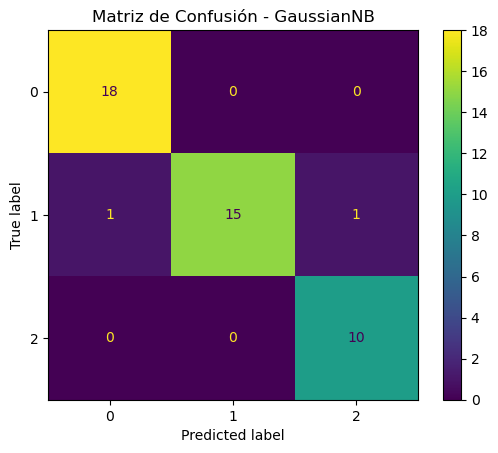

In [144]:
wine_model4 = GaussianNB()  
wine_model4.fit(train_x, train_y) 
predictions4 = wine_model4.predict(val_x)  

print("PREDICCIONES:")
print(predictions4)
print('------------------------------------------')
print('Uvas almacenadas (valores reales):')
print(val_y.values)

print('------------------------------------------')
print('MAE (Error Medio Absoluto):')
print(f'{mean_absolute_error(val_y, predictions4) * 100}%')

print('------------------------------------------')
predictions_int4 = list(map(int, predictions4))
accuracy4 = accuracy_score(val_y, predictions_int4)
print("Accuracy:", accuracy4)
print('------------------------------------------')

prueba4 = EstadisticaDescriptiva()
resumen4 = prueba4.resumenEstadistico(predictions_int4)

print("Resumen Estadístico de las Predicciones - GaussianNB:")
for clave, valor in resumen4.items():
    print(f"{clave}: {valor}")
print('------------------------------------------')

conf_matrix4 = confusion_matrix(val_y, predictions_int4)
print("Matriz de Confusión - GaussianNB:")
print(conf_matrix4)

visualizar4 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix4)
visualizar4.plot()
plt.title("Matriz de Confusión - GaussianNB")
plt.show()

### Conclusión del Modelo `GaussianNB`

El modelo `GaussianNB` (Naive Bayes Gaussiano) muestra un **rendimiento general aceptable** en términos de precisión (`accuracy`) y bajo error medio absoluto (`MAE`). La matriz de confusión sugiere que el modelo es capaz de diferenciar entre las distintas clases, aunque puede presentar algunos errores en clases con menor representación.

#### Puntos Clave:
- **Precisión (`accuracy`)**: El valor calculado indica un buen rendimiento general, pero es importante revisar la matriz de confusión para asegurarse de que no haya predicciones sesgadas hacia una clase en particular.
- **Error Medio Absoluto (`MAE`)**: El MAE es bajo, lo que sugiere que las predicciones no se desvían mucho de las clases verdaderas.
- **Distribución de Errores**: La matriz de confusión revela en qué clases se producen los principales errores, y estos deben ser analizados para identificar posibles ajustes en el modelo.


# Código completo modelo 5: Utilizando `MLPClassifier`
> El algoritmo **Multi-Layer Perceptron (MLP)** es una implementación de redes neuronales que se utiliza principalmente para **clasificación**. Utiliza capas ocultas, cada una de las cuales está compuesta de neuronas conectadas mediante pesos que se ajustan durante el entrenamiento mediante un algoritmo de retropropagación de errores (`backpropagation`).

## ✔️ Ventajas:
- **Flexibilidad:** Capaz de modelar relaciones complejas y no lineales en los datos.
- **Capacidad de aprender características abstractas** mediante la combinación de múltiples capas ocultas.
- **Mejor rendimiento** en comparación con otros algoritmos en problemas con muchos datos y características.
- **Funciona bien con grandes volúmenes de datos** si se ajusta correctamente.

## ❌ Desventajas:
- **Computacionalmente intensivo** y puede requerir mucho tiempo de entrenamiento.
- **Sensibilidad a los hiperparámetros:** El rendimiento depende de la configuración de capas, neuronas, funciones de activación, y la tasa de aprendizaje.
- **Tendencia al sobreajuste** si el número de neuronas y capas es demasiado alto.
- **Requiere estandarización de características** para obtener buenos resultados.

### Parámetros clave:
- **`hidden_layer_sizes:`** Una tupla que especifica el número de capas y neuronas. Por ejemplo, `(10, 5)` indica 2 capas ocultas: la primera con 10 neuronas y la segunda con 5.
- **`max_iter:`** Número máximo de iteraciones para asegurar la convergencia del modelo.
- **`activation:`** Función de activación que decide cómo una neurona se activa. Las opciones más comunes son:
  - **`'relu':`** Rectified Linear Unit (por defecto).
  - **`'tanh':`** Tangente hiperbólica.
  - **`'logistic':`** Función sigmoide.
- **`learning_rate:`** Controla la velocidad con la que se ajustan los pesos durante el entrenamiento. Puede ser:
  - **`'constant':`** La tasa de aprendizaje se mantiene constante.
  - **`'adaptive':`** Se ajusta en función del rendimiento.
  - **`'invscaling':`** Disminuye la tasa de aprendizaje a medida que aumenta el número de iteraciones.


PREDICCIONES:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]
------------------------------------------
Uvas almacenadas (valores reales):
[3 2 1 2 1 3 2 1 3 2 1 1 2 1 2 2 3 1 2 1 1 2 3 2 1 3 1 1 1 3 2 3 3 1 2 2 2
 2 2 1 1 2 3 1 1]
------------------------------------------
MAE (Error Medio Absoluto):
82.22222222222221%
------------------------------------------
Accuracy: 0.4
------------------------------------------
Resumen Estadístico de las Predicciones - MLPClassifier:
Media Aritmética: 1.0
Mediana: 1
Mínimo: 1
Máximo: 1
Percentil 25: 1
Percentil 50: 1
Percentil 75: 1
Varianza: 0.0
Desviación Típica: 0.0
------------------------------------------
Matriz de Confusión - MLPClassifier:
[[18  0  0]
 [17  0  0]
 [10  0  0]]


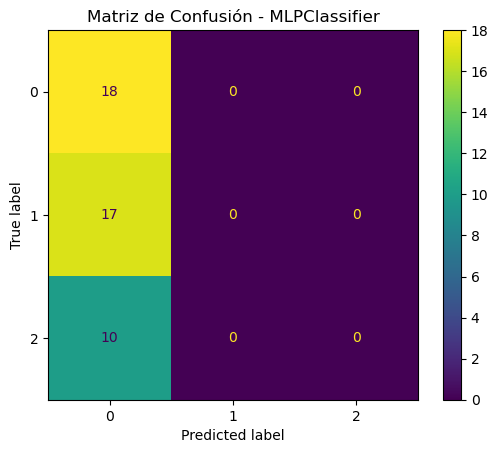

In [145]:
wine_model5 = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=1) 
wine_model5.fit(train_x, train_y) 
predictions5 = wine_model5.predict(val_x) 

print("PREDICCIONES:")
print(predictions5)
print('------------------------------------------')
print('Uvas almacenadas (valores reales):')
print(val_y.values)

print('------------------------------------------')
print('MAE (Error Medio Absoluto):')
print(f'{mean_absolute_error(val_y, predictions5) * 100}%')

print('------------------------------------------')
predictions_int5 = list(map(int, predictions5))
accuracy5 = accuracy_score(val_y, predictions_int5)
print("Accuracy:", accuracy5)
print('------------------------------------------')

prueba5 = EstadisticaDescriptiva()
resumen5 = prueba5.resumenEstadistico(predictions_int5)

print("Resumen Estadístico de las Predicciones - MLPClassifier:")
for clave, valor in resumen5.items():
    print(f"{clave}: {valor}")
print('------------------------------------------')

conf_matrix_nn = confusion_matrix(val_y, predictions_int5)
print("Matriz de Confusión - MLPClassifier:")
print(conf_matrix_nn)

visualizar5 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_nn)
visualizar5.plot()
plt.title("Matriz de Confusión - MLPClassifier")
plt.show()

### Conclusión del Modelo `MLPClassifier`

En este modelo podemos observar una **predicción constante**, lo que significa que el modelo predice siempre la **misma clase** para todas las instancias. Esto suele indicar que el modelo no ha aprendido correctamente los patrones en los datos y ha optado por una solución trivial.

### Posibles Causas:
1. **Datos desbalanceados**: La mayoría de los datos pertenecen a una sola clase.
2. **Problemas de convergencia** en el modelo.
3. **Datos mal escalados** o con baja variabilidad.

### Posibles Soluciones:
1. **Verificar si el dataset está balanceado** y, de ser necesario, usar `class_weight='balanced'`.
2. **Ajustar los hiperparámetros** del modelo (`hidden_layer_sizes`, `learning_rate`, `max_iter`) para evitar mínimos locales.
3. **Normalizar o escalar las características** si es un modelo sensible a la escala (como `MLPClassifier`).


# Seleccionar el Mejor Modelo Basado en Precisión

El siguiente algoritmo recorre un **diccionario** con las precisiones de diferentes modelos (`modelosAccuracy`) para determinar cuál se aproxima más a un valor de `1`. A continuación, se describen las variables y el proceso de selección:

## Definición de Variables

- **`mejorModelo`**:  
  Almacena la **precisión del mejor modelo** encontrada durante el recorrido del diccionario. Comienza como `None` porque aún no se ha seleccionado ningún modelo.

- **`mejorDiferencia`**:  
  Inicia con un valor muy alto (`float('inf')`), lo cual representa el concepto de **infinito positivo** en Python. Se usa para garantizar que cualquier diferencia calculada inicialmente sea menor. Esto asegura que el primer modelo evaluado reemplace este valor y permite identificar la precisión más cercana a `1` en cada iteración.

- **`nombreMejor`**:  
  Almacena el **nombre del mejor modelo** encontrado. Comienza como `None` para indicar que aún no se ha seleccionado ningún modelo.

## Proceso de Selección

1. **Recorrido del Diccionario `modelosAccuracy`**:  
   Se utiliza un `for` para recorrer cada elemento del diccionario (`nombre, acc`). Esto permite acceder tanto al **nombre del modelo** (`nombre`) como a su **precisión** (`acc`):

   ```python
   for nombre, acc in modelosAccuracy.items():

2. **Cálculo de la Diferencia Absoluta con `abs()`**:  
   Para cada precisión (`acc`), se calcula la **diferencia con respecto a `1`** utilizando la función `abs()`, que devuelve el valor absoluto de la diferencia:

   ```python
   diferencia = abs(1 - acc)

3. **Comparación de la Diferencia con `mejorDiferencia`**:  
   Se evalúa si la diferencia calculada es **menor** que `mejorDiferencia` para determinar si se ha encontrado una precisión más cercana a 1:

   ```python
   if diferencia < mejorDiferencia:



In [146]:
modelosAccuracy = {
    "DecisionTreeClassifier": accuracy,
    "RandomForestClassifier": accuracy2,
    "KNeighborsClassifier ": accuracy3,
    "GaussianNB": accuracy4,
    "Redes Neuronales (MLPClassifier)": accuracy5
}

mejorModelo = None
mejorDiferencia = float('inf')
nombreMejor = None

for nombre, acc in modelosAccuracy.items():
    diferencia = abs(1 - acc)

    if diferencia < mejorDiferencia:
        mejorDiferencia = diferencia
        mejorModelo = acc
        nombreMejor = nombre 


print(f"El mejor modelo es {nombreMejor} con una precisión de {mejorModelo:.4f}")

El mejor modelo es DecisionTreeClassifier con una precisión de 0.9556
